# Анализ гипотез для увеличения выручки интернет-магазина 

# Часть 1. Приоритизация гипотез.

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

Задача
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

# Часть 2. Анализ A/B-теста

Провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.

Задача

Проанализируйте A/B-тест:

- Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
- Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
- Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
- Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделатьвыводы и предположения.
- Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
- Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
- Построить точечный график стоимостей заказов. Сделать выводы и предположения.
- Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
- Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
- Принять решение по результатам теста и объяснить его. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

# Предобработка данных

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib import pyplot as plt

In [2]:
hypothesis=pd.read_csv('/datasets/hypothesis.csv')
orders=pd.read_csv('/datasets/orders.csv')
visitors=pd.read_csv('/datasets/visitors.csv')
display(hypothesis.head(10))
display(hypothesis.info())
display(orders.head(10))
display(orders.info())
display(visitors.head(10))
display(visitors.info())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [3]:
visitors['date'] = visitors['date'].astype('datetime64[D]')
orders['date'] = orders['date'].astype('datetime64[D]')

In [4]:
display('Количество дубликатов в датафреймах')
display(hypothesis.duplicated().sum())
display(orders.duplicated().sum())
display(visitors.duplicated().sum())

'Количество дубликатов в датафреймах'

0

0

0

In [5]:
display('Количество пропусков в датафреймах')
display(hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

'Количество пропусков в датафреймах'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

# Вывод: 
В датасетах отсутствуют явные дубликаты и пропущенные значения. 
Формат столбцов с датами преобразован.

## Приоритизация гипотез

In [6]:
hypothesis['ICE'] = ((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']).round(1)
hypothesis['RICE'] = (hypothesis['Reach']  *hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

In [7]:
display(hypothesis.sort_values(by='ICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


In [8]:
display(hypothesis.sort_values(by='RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.2,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.3,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.2,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.1,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.3,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


# Вывод:

Применены фреймворки ICE и RICE для приоритизации гипотез. 
В фреймофрке RIСE учитывается параметр REACH, который существенно влияет на приоритезацию гипотез. В тройку лидеров по фреймфорку ICE вошли гипотезы № 8,0,7. А по фреймофку RICE уже 7,2,0. Для гипотезы 7 параметр Reach наибольший. Стоит тестировать гипотезы по параметру RICE №7,2,0

## Анализ A/B-теста

In [9]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]. \
                                     agg({'date' : 'max', 
                                          'group' : 'max', 
                                          'transactionId' : pd.Series.nunique, 
                                          'visitorId' : pd.Series.nunique, 
                                          'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]. \
                                       agg({'date' : 'max', 
                                            'group' : 'max', 
                                            'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### График кумулятивной выручки по группам

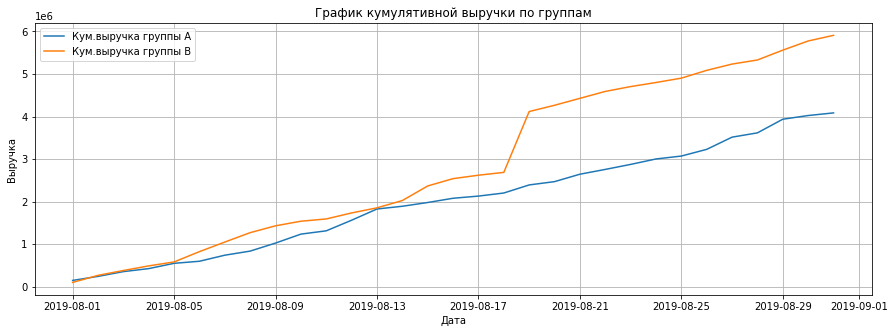

In [10]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15,5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='Кум.выручка группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='Кум.выручка группы B')
plt.grid()
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.legend() ;

Вывод: Выручки до 17 августа в обоих группах возрастают одинаково (в группе В немного выше выручка), с 18 августа наблюдается резкий вырост выручки в группе В. Наиболее вероятно, что были крупные заказы в эти даты. 

### График кумулятивного среднего чека по группам

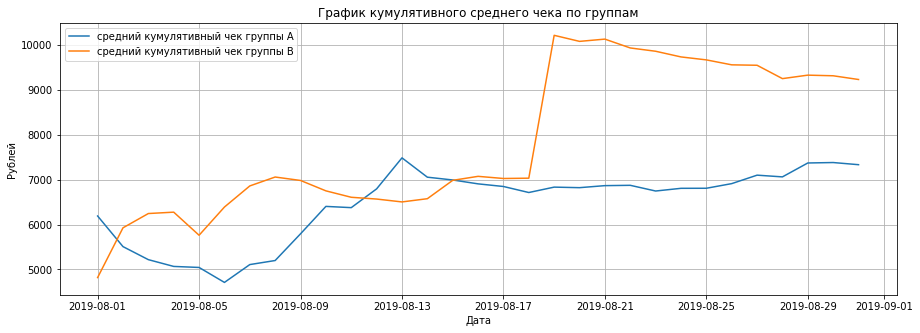

In [11]:
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='средний кумулятивный чек группы A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='средний кумулятивный чек группы B')
plt.legend() 
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Рублей')
plt.show()

Вывод: Средний чек для группы А возрастает до 13 августа, в то время как с 9 по 13 августа для группы А стабильно падает. До 18 августа для группы В средний чек возрастает. 

### График относительного изменения кумулятивного среднего чека группы B к группе A

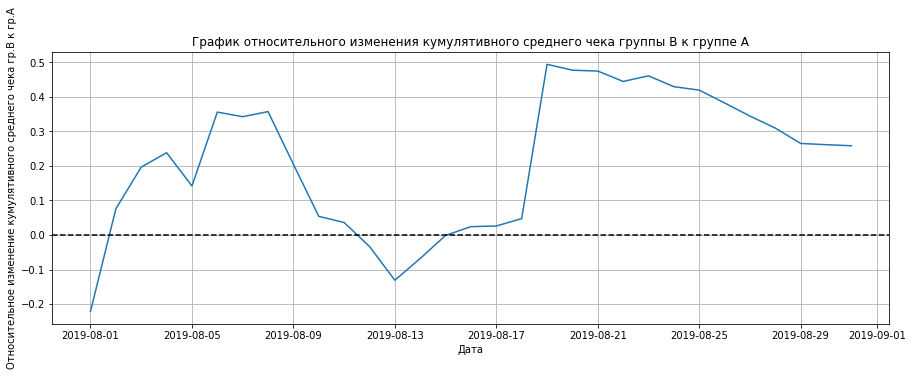

In [260]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/ \
         (mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение кумулятивного среднего чека гр.B к гр.A')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Вывод: кумулятивный средний чек возрастает до 7 августа, далее наблюдается падение до 13 августа, рост до 18 августа, с дальнейшим снижением до конца месяца

###   График кумулятивного среднего количества заказов на посетителя по группам

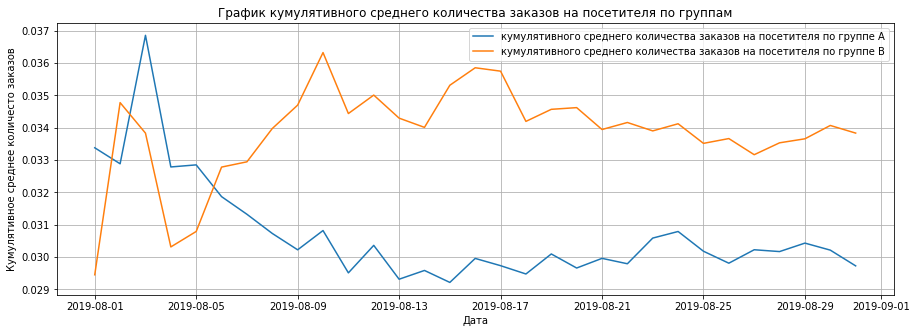

In [264]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(15,5))
plt.grid()
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='кумулятивного среднего количества заказов на посетителя по группе A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='кумулятивного среднего количества заказов на посетителя по группе B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.legend()
plt.ylabel('Кумулятивное среднее количесто заказов')
plt.xlabel('Дата')
plt.show()

Вывод: кумулятивное среднее количество заказов на посетителя до 4 августа у группы А выше, далее наблюдается возрастания кумулятивного среднего количества заказов на посетителя у группы В с дальнейшийм преобладанием над группой А.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

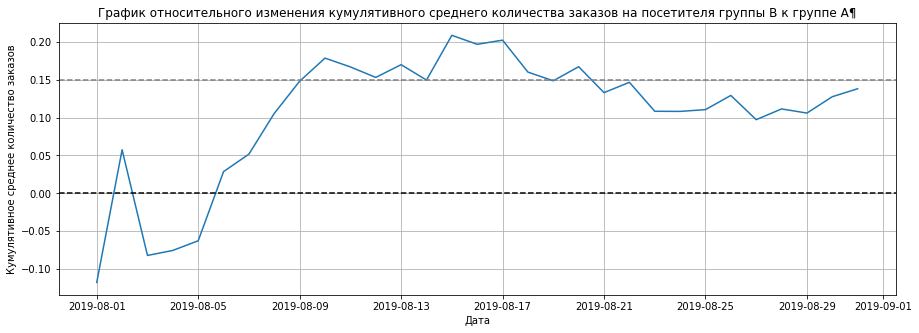

In [14]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], \
                                                    left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(15,5))
plt.grid()
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A¶')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.show()

Вывод: Кумулятивное среднее количество заказов на посетителя в группе В выше кумулятивного среднего количества заказов на посетителя в группе А после 6 августа 

### Точечный график количества заказов по пользователям

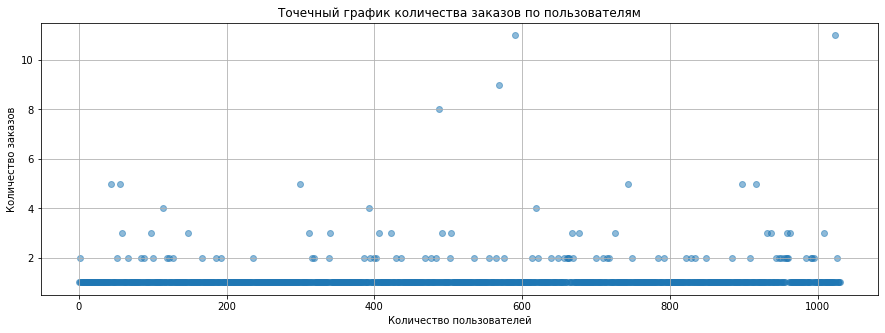

In [15]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False). \
                                                                        agg({'transactionId' : pd.Series.nunique})

ordersByUsers.columns = ['user_id','orders']

ordersByUsers.sort_values(by='orders',ascending=False).head(10)

x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(15,5))
plt.grid()
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.title('Точечный график количества заказов по пользователям')
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.5) ;

Вывод: Большая часть пользователей совершает 1-2 заказа

### Расчет 95 и 99 перцентилей количества заказов на пользователя

In [16]:
print('Рассчитаем 95 и 99 перцентили по заказам : ', np.percentile(ordersByUsers['orders'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по заказам :  [2. 4.]


Вывод: больше 2 заказов совершают 5 процентов пользователей, а больше 4 - 1 процент

### Точечный график стоимостей заказов

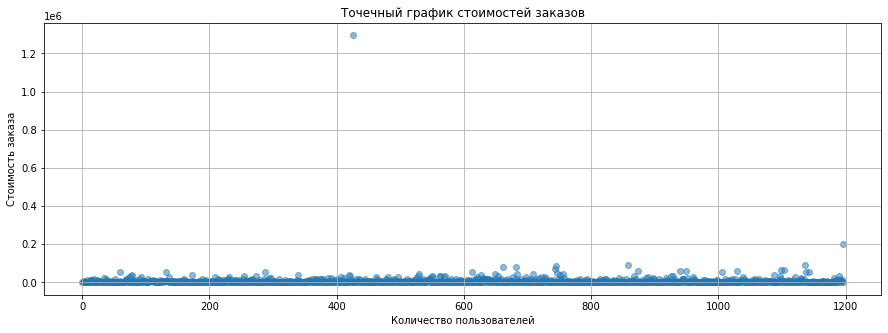

In [17]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(15,5))
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'], alpha=0.5)


За исключение единичных заказов на 1,2 млн. и 200 тыс., пользователи не тратят больше 60 тыс. на заказ

### Расчет 95 и 99 перцентилей стоимости заказов

In [18]:
print('Рассчитаем 95 и 99 перцентили по выручке заказов : ', np.percentile(orders['revenue'], [95, 99])) 

Рассчитаем 95 и 99 перцентили по выручке заказов :  [28000.  58233.2]


Вывод: большая часть пользователей (99 процентов) тратит не больше 58233 на заказ.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Нулевая гипотеза: Среднее количество заказов на посетителя по "сырым" данным между группами не отличается 

Альтернативная гипотеза: Среднее количество заказов на посетителя по "сырым" данным между группами отличается 

Проводим U-тест Манна-Уитни, т.к. это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [19]:
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]. \
                                            agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']


ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']



data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')




ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)
alpha=0.05
print("alpha = {0:.2f}".format(alpha)) 
pvalue=stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1]
print("p-value = {0:.3f}".format(pvalue))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

alpha = 0.05
p-value = 0.017
Относительный показатель 'B' и 'A' = 0.138
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу
. По "сырым данным" разница в количестве заказов между группами есть

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Нулевая гипотеза: Отсутствует различие в среднем чеке заказа между группами по «сырым» данным

Альтернативная гипотеза: Существует различие в среднем чеке заказа между группами по «сырым» данным

Проводим U-тест Манна-Уитни, т.к. это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [20]:
print("alpha = {0:.2f}".format(alpha)) 
pvalue=stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]
print("p-value = {0:.3f}".format(pvalue))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))                                                                            
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

alpha = 0.05
p-value = 0.729
Относительный показатель 'B' и 'A' = 0.259
Нет оснований отвергнуть нулевую гипотезу


Вывод: Нет оснований отвергнуть нулевую гипотезу. По "сырым данным" разница в среднем чеке между группами отсутствует

### Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Нулевая гипотеза: Отсутствует различие в среднем количестве заказов на посетителя между группами по «очищенным» данным

Альтернативная гипотеза:  Присутствует различие в среднем количестве заказов на посетителя между группами по «очищенным» данным

Проводим U-тест Манна-Уитни, т.к. это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [256]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId'], ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], 95)]['userId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()



sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), \
                                       name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'], \
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), \
                                       name='orders')],axis=0) 


print("alpha = {0:.2f}".format(alpha)) 
pvalue=stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1]
print("p-value = {0:.3f}".format(pvalue))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

alpha = 0.05
p-value = 0.010
Относительный показатель 'B' и 'A' = 0.174
Отвергаем нулевую гипотезу


Вывод: Отвергаем нулевую гипотезу. По "очищенным" данным разница между группами по среднему количеству заказов значима

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: По "очищенным" данным разница между группами по среднему чеку отсутствует

Альтернативная гипотеза: По "очищенным" данным разница между группами по среднему чеку присутствует

Проводим U-тест Манна-Уитни, т.к. это статистический критерий, используемый для оценки различий между двумя независимыми выборками по уровню какого-либо признака, измеренного количественно.

In [22]:
print("alpha = {0:.2f}".format(alpha)) 
pvalue=stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]
print("p-value = {0:.3f}".format(pvalue))
print("Относительный показатель 'B' и 'A' = {0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 
if pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нет оснований отвергнуть нулевую гипотезу')

alpha = 0.05
p-value = 0.798
Относительный показатель 'B' и 'A' = -0.020
Нет оснований отвергнуть нулевую гипотезу


Вывод: Нет оснований отвергнуть нулевую гипотезу. По "очищенным" данным разница между группами по среднему чеку отсутствует

### Решение по результатам теста

Кумулятивные данные выше для группы В (даже после исключения аномальных заказов. По "очищенным" данным разница между группами по среднему количеству заказов значима, благодаря чему можно сделать вывод об остановке А/В теста.